<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/edo/blob/main/banco_preguntas/trabajo_final_dinamica_poblacional/5_palomino_yesi/palomino_yesi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

# Describa la situación agregándole imágenes ilustrativas. 
Deje claro cual es el problema a resolver. 

# Crecimiento de bacterias

En el tiempo $t = 0$, un cultivo bacteriano pesa 1 gramo.   
Dos horas después, el cultivo pesa 4 gramos.  
El peso máximo del cultivo es de 20 gramos.  

 a) Escribir una ecuación logística que modele el peso del cultivo bacteriano.  
 
 b) Encontrar el peso del cultivo después de 5 horas.  
 
 c) ¿Cuándo el peso del cultivo será de 18 gramos?  
 
 d) Escribir una ecuación diferencial logística que modele la razón de crecimiento del peso del cultivo. Entonces repetir 
el inciso b) mediante el método de Euler con un tamaño de  paso de h  1. Comparar la aproximación con los resultados
exactos.  

 e) ¿En qué tiempo se incrementará el peso más rápidamente? Explicar.

## Recuerde que la ecuación logística es:

$$ \frac{dy}{dt} = ky \left( 1 - \frac{y}{L} \right) $$

donde $k$ y $L$ son constantes positivas.  

 
Una población que satisface esta ecuación no crece sin límite, pero se aproxima a la cantidad límite o de soporte $L$ al aumentar $t$. 

## Realizar una lectura o interpretación de la ED y de la condición inicial

$$ \frac{dw}{dt} = kw\left(1 - \frac{w}{20} \right), \ \ \ \ \ \ w(0) = 1, \ \ \ \ \ w(2) = 4, \ \ w(5) = ??? $$

don de el tiempo está en horas. 

Suponiendo que $w < 20$, entonces $\frac{w}{20} < 1$, de donde $0 < 1 - \frac{w}{20}$, es decir, este factor es positivo y decreciente a cero. 

## Clasifica la ED justificando su proceso de clasificación

Como la ecuación dada es de la forma $w' = f(w)g(t)$, 

con $f(w) = w\left( 1 - \frac{w(t)}{L} \right)$ y $g(t) = k$, entonces la ED dada es separable. 

## Realice la solución analítica y describala con fluidez 

Una línea del cuaderno por paso descrito verbalmente, simbólicamente y justificado verbalmente. 

$$ \frac{dw}{dt} = kw\left(1- \frac{w}{20} \right), \ \ \ \ \ \  w(0) = 1 $$

Empecemos sepando las variables: 
$$ \frac{dw}{w\left( 1- \frac{w}{20}  \right)} = kdt $$

sumando y dividiendo fracciones obtenemos: 

$$ \frac{20}{w(20-w)}dw = kdt $$

y ahora que separamos integremos cada lado: 

$$ \int \frac{20}{w(20-w)}dw = \int kdt $$

$$ \int \frac{20}{w(20-w)}dw = \int kdt $$

Note que el integrando del lado izquierdo es una fracción propia, donde los factores del denominador son lineales no repetidos, por tanto esa fracción se descompone así:


$$  \int \left( \frac{A}{w} + \frac{B}{20-w} \right) = \int kdt $$

Para determinar a $A$ y a $B$ planteamos la siguiente igualdad:

$$ \frac{20}{w(20-w)}  =  \frac{A}{w} + \frac{B}{20-w}  $$


$$ \frac{1}{w(20-w)}  = \frac{A(20 - w) + Bw}{w(20-w)} $$

Pasemos el denominador del lado derecho a multiplicar al lado izquierdo:

$$ \frac{w(20-w)}{w(20-w)}  = A(20 - w) + Bw $$

$$ 1 = A(20 - w) + Bw  $$

Si hago $w = 0$, podemos hallar a $A$:

$$ 1 = A(20 - 0) + B(0) \: \: \: \Rightarrow \ \ \ A = \frac{1}{20} = B$$


Volviendo a la ecuación integral obtenemos:


$$ \int \left( \frac{1}{w} + \frac{1}{20-w} \right)dw = \int kdt $$

$$ \int \frac{dw}{w} + \int \frac{dw}{20-w} = kt + C_{1} $$

$$ \ln w - \ln (20 - w ) = kt + C_{1} $$

$$ \ln \left( \frac{w}{20-w} \right) = kt + C_{1} $$

$$ \frac{w}{20-w} = e^{kt + C_{1}} $$

$$ w = e^{kt + C_{1}}(20 - w) = e^{kt}e^{C_{1}}(20-w)$$

$$ w = C_{2}e^{kt}(20 - w) $$

$$ w = 20C_{2}e^{kt} - C_{2}we^{kt} $$

$$ w + C_{2}we^{kt} = 20C_{2}e^{kt} $$

$$ w = \frac{20C_{2}e^{kt}}{1 + C_{2}e^{kt}} $$

dividamos numerador y denominador por $C_{2}e^{kt}$:

$$ w = \frac{20}{\frac{1}{C_{2}e^{kt}} + 1} $$

## Solución general explícita 

Luego, la solución general explícita es:  

$$ w = \frac{20}{C_{3}e^{-kt} + 1} $$

In [6]:
def sol_gen(t,c,k):
    return 20/(c*np.exp(-k*t)+1) 

Sustituimos la condición inicial $p(0) = 1$ para determinar $C_{3}$:

$$ 1 = \frac{20}{C_{3} + 1} $$


$$ C_{3} = 19 $$

Y así la solución del PVI es 

$$ w = \frac{20}{19e^{-kt} + 1} $$

Pero todavía no tenemos la constante de proporcionalidad $k$. Y para determinarla sustituimos la segunda condición $p(2) = 4$:

$$ 4 = \frac{20}{19e^{-2k} + 1} $$


$$ 4(19e^{-2k} + 1) = 20 $$

$$ 76e^{-2k} + 4 = 20 $$

$$ 76e^{-2k} = 20 - 4 = 16 $$

$$ e^{-2k} = \frac{16}{76} $$

$$ -2k = \ln \left( \frac{16}{76} \right) $$

$$ -2k = \ln \frac{8}{38} $$

$$ -2k = \ln \frac{4}{19} $$

$$ k = \frac{\ln(4/19)}{-2} $$

Por lo tanto, la ecuación logística que satisface la ED y las dos condiciones iniciales es:

$$ w(t) = \frac{20}{19e^{\frac{\ln(4/19)}{2}t} + 1} $$


In [3]:
import numpy as np 
k = np.log(4/19)/2 
round(k,2) 

-0.78

$$ w(t) = \frac{20}{19e^{-0.78t} + 1} $$

# Realice la solución con SymPy del PVI y verifique la solución obtenida también con Sympy

In [3]:
from sympy import var, Function, Eq, diff, classify_ode, solve, dsolve,  checkodesol

In [11]:
t,w, k = var('t w k') 

In [12]:
w = Function('w')

In [13]:
ecuacion = Eq(diff(w(t), t),k*w(t)*(1-w(t)/20) )
ecuacion 

Eq(Derivative(w(t), t), k*(1 - w(t)/20)*w(t))

In [14]:
classify_ode(ecuacion, w(t))

('factorable',
 'separable',
 '1st_exact',
 'Bernoulli',
 '1st_rational_riccati',
 '1st_power_series',
 'lie_group',
 'separable_Integral',
 '1st_exact_Integral',
 'Bernoulli_Integral')

In [15]:
sol_gen = dsolve(ecuacion, w(t), hint = 'separable')
sol_gen 

Eq(w(t), 20/(C1*exp(-k*t) + 1))

In [16]:
sol_pvi = dsolve(ecuacion, w(t), hint = 'separable', ics = {sol_gen.lhs.subs(t,0): 1})
sol_pvi 

Eq(w(t), 20/(1 + 19*exp(-k*t)))

## Determine $k$ utilizando la segunda condición del problema, es decir, utilizando que cuando $t = 2$, $w = 4$

In [17]:
solve(Eq(sol_pvi.lhs.subs(t,2).subs(w(2), 4), sol_pvi.rhs.subs(t, 2) ), k)

[-log(2) + log(19)/2, -log(2) + log(19)/2 + I*pi]

 $$ k = \ln \frac{\sqrt{19}}{2} $$ 

In [3]:
import numpy as np 
k = np.log(np.sqrt(19)/2)
round(k,2)  

0.78

Por lo tanto, hemos encontrado con Sympy, la misma solución que con el método analítico aplicado que fue bastante largo y dispendioso. 

## Grafique con matplotlib la solución general de la ED que hace parte de su PVI con deslizadores 

La gráfica de la solución general la debe hacer incluyendo el deslizador para el parámetro $C_{1}$ y un deslizador para el parámetro $k$(constante de proporcionalidad). 


In [4]:
import numpy as np 
def w(t, k = np.log(np.sqrt(19)/2)):
    return 20/(1 + 19*np.exp(-k*t))

In [6]:
round(w(5),2)

14.43

## Gráfico animado de la solución general de la ED con los deslizadores para los parámetros $C_{1}$ y $k$

In [21]:
import numpy as np 
import matplotlib.pyplot as plt 
from ipywidgets import interact

def sol_Gen(t,c,k):
    return 20/(c*np.exp(-k*t)+1) 

def grafica_sol_gen(c=19, k=0.78):
    fig,ax = plt.subplots(figsize = (8,7))
    ax.set(title = 'Solución general de la ED del PVI',\
       xlabel = r'tiempo $t$', ylabel = r'peso $w$')
    dominio = np.arange(0,30, 0.1)
    rango = [sol_Gen(t, k = k, c = c) for t in dominio]
    ax.plot(dominio, rango)
    # dimensiones del rectángulo de visualización
    
    ax.axis([np.min(dominio)-1, np.max(dominio)+1, np.min(rango)-1,\
             np.max(rango)+1])
    ax.grid(alpha = 0.4)
    plt.yticks(np.arange(1,22))
    
interact(grafica_sol_gen, c = (1,20), k = (0,1,0.01))    
plt.show() 

interactive(children=(IntSlider(value=19, description='c', max=20, min=1), FloatSlider(value=0.78, description…

## Observaciones he inferencias del gráfico de la solución general

1. Los valores de $k$ pequeños hacen que el tiempo en alcanzar el peso máximo sea mayor.  
2.  
3.  
4.  
5.  

# Gráfica de la solución del PVI

## Observaciones e inferencias del gráfico

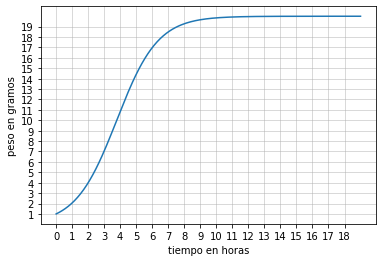

In [15]:
import numpy as np 
import matplotlib.pyplot as plt 

a,b = 0, 19
k = np.log(np.sqrt(19)/2)

fig,ax = plt.subplots()
dominio = np.linspace(a,b, 200)
rango = [w(t) for t in dominio]
ax.plot(dominio, rango)   
ax.grid(alpha = 0.6)
ax.set(xlabel = 'tiempo en horas', ylabel = 'peso en gramos')
plt.yticks(np.arange(1,20))
plt.xticks(np.arange(0,19))
plt.show()


## Observaciones e inferencias del gráfico del PVI

1. El peso inicial es de 1 gramo.  
2. A las dos horas es de 4 gramos  
3.  
4.  
5.  

# Gráfica de la función derivada

In [16]:
def derivada_de_w(t):
    return k*w(t)*(1-w(t)/20)

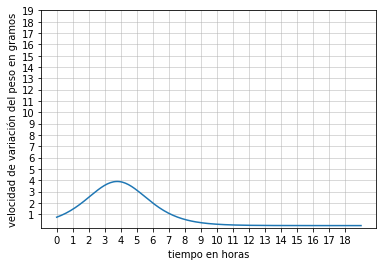

In [17]:
import numpy as np 
import matplotlib.pyplot as plt 

a,b = 0, 19
k = np.log(np.sqrt(19)/2)

fig,ax = plt.subplots()
dominio = np.linspace(a,b, 200)
rango = [derivada_de_w(t) for t in dominio]
ax.plot(dominio, rango)   
ax.grid(alpha = 0.6)
ax.set(xlabel = 'tiempo en horas', ylabel = 'velocidad de variación del peso en gramos')
plt.yticks(np.arange(1,20))
plt.xticks(np.arange(0,19))
plt.show()


## Referentes  

* Documentación sobre solución de ODE con sympy: https://docs.sympy.org/latest/modules/solvers/ode.html 